Churn prediction is the process of identifying customers who are likely to leave a company or stop using a product or service.Additionally, predicting customer churn can help a bank better understand the factors that lead customers to leave. This can allow the bank to identify and address any issues that may be causing customers to churn, such as poor service or a lack of relevant products and services. By identifying and addressing these issues, a bank can improve its overall customer retention rate and reduce the cost of customer acquisition. Overall, predicting customer churn is important to do for a bank because it can help the bank retain valuable customers and improve its overall profitability.

In [ ]:
# data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# cross validation
from sklearn.model_selection import train_test_split

# import svm model
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# model optimization
from sklearn.model_selection import GridSearchCV


In [ ]:
bank_df = pd.read_csv('/content/sample_data/churn.csv')
bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Data Description:

    CustomerId—contains random values.
    Surname—the surname of a customer.
    CreditScore—since a customer with a higher credit score is less likely to leave the bank—can have an impact on customer churn.
    Geography—a customers' location may influence their choice to quit the bank.
    Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    Age—this factor is unquestionably important because older customers are less likely than younger ones to leave their bank.
    Tenure (years)—refers to the number of years that the customer has been a client of the bank. Older customers are typically more dependable and less likely to leave a bank.
    Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    NumOfProducts—refers to the number of products that a customer has purchased through the bank.
    HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant since people with a credit card are less likely to leave the bank.
    IsActiveMember—active customers are less likely to leave the bank.
    EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    Exited—whether or not the customer left the bank.

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bank_df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


RowNumber and CustomerId has a unique value on every row and those columns mean nothing. From the business point of view, the Surname also exactly has no effect/impact on their decision to leave the bank.

In [ ]:
bank_df = bank_df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)
bank_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


we will perform feature engineering by changing the data type Geography, Gender to category.

In [ ]:
cat_cols = ['Geography', 'Gender']
bank_df[cat_cols] = bank_df[cat_cols].astype('category')
bank_df.dtypes

,0
CreditScore,int64
Geography,category
Gender,category
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
bank_df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
bank_df.duplicated().sum()

0

In [ ]:
bank_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


we also can focus on the mean of each binary columns (only have 0 and 1 value), such as ‘HasCrCard’, ‘IsActiveMember’, ‘Exited’. From the mean, we can find out the distribution the data that we have. Example: for HasCrCard it has a mean = 0.70, it can be said that 70% of the bank customer data has credit card. And, from this one we know that the scale in each column is very different. So, maybe in the next process we can try standardization/normalization depend on our data distribution is Gaussian or not.


In [ ]:
bank_df.describe(include='category')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


<Axes: xlabel='Exited'>

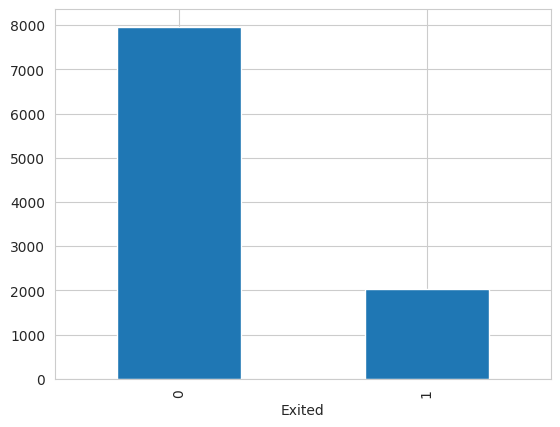

In [ ]:
bank_df['Exited'].value_counts().plot(kind='bar')

Most importantly, we know that our target variable Exited has a fairly imbalanced amount. Where there are more customers who will not leave the bank (7963) than those who will leave the bank (churn). So, later, it will be necessary to do treatment so that this imbalanced problem does not affect the model's performance.

Check Outliers using Z Score


<ipython-input-47-fa7b3a7affa6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=col, ax=ax[i], palette='pastel')
<ipython-input-47-fa7b3a7affa6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=col, ax=ax[i], palette='pastel')
<ipython-input-47-fa7b3a7affa6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x=col, ax=ax[i], palette='pastel')
<ipython-input-47-fa7b3a7affa6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

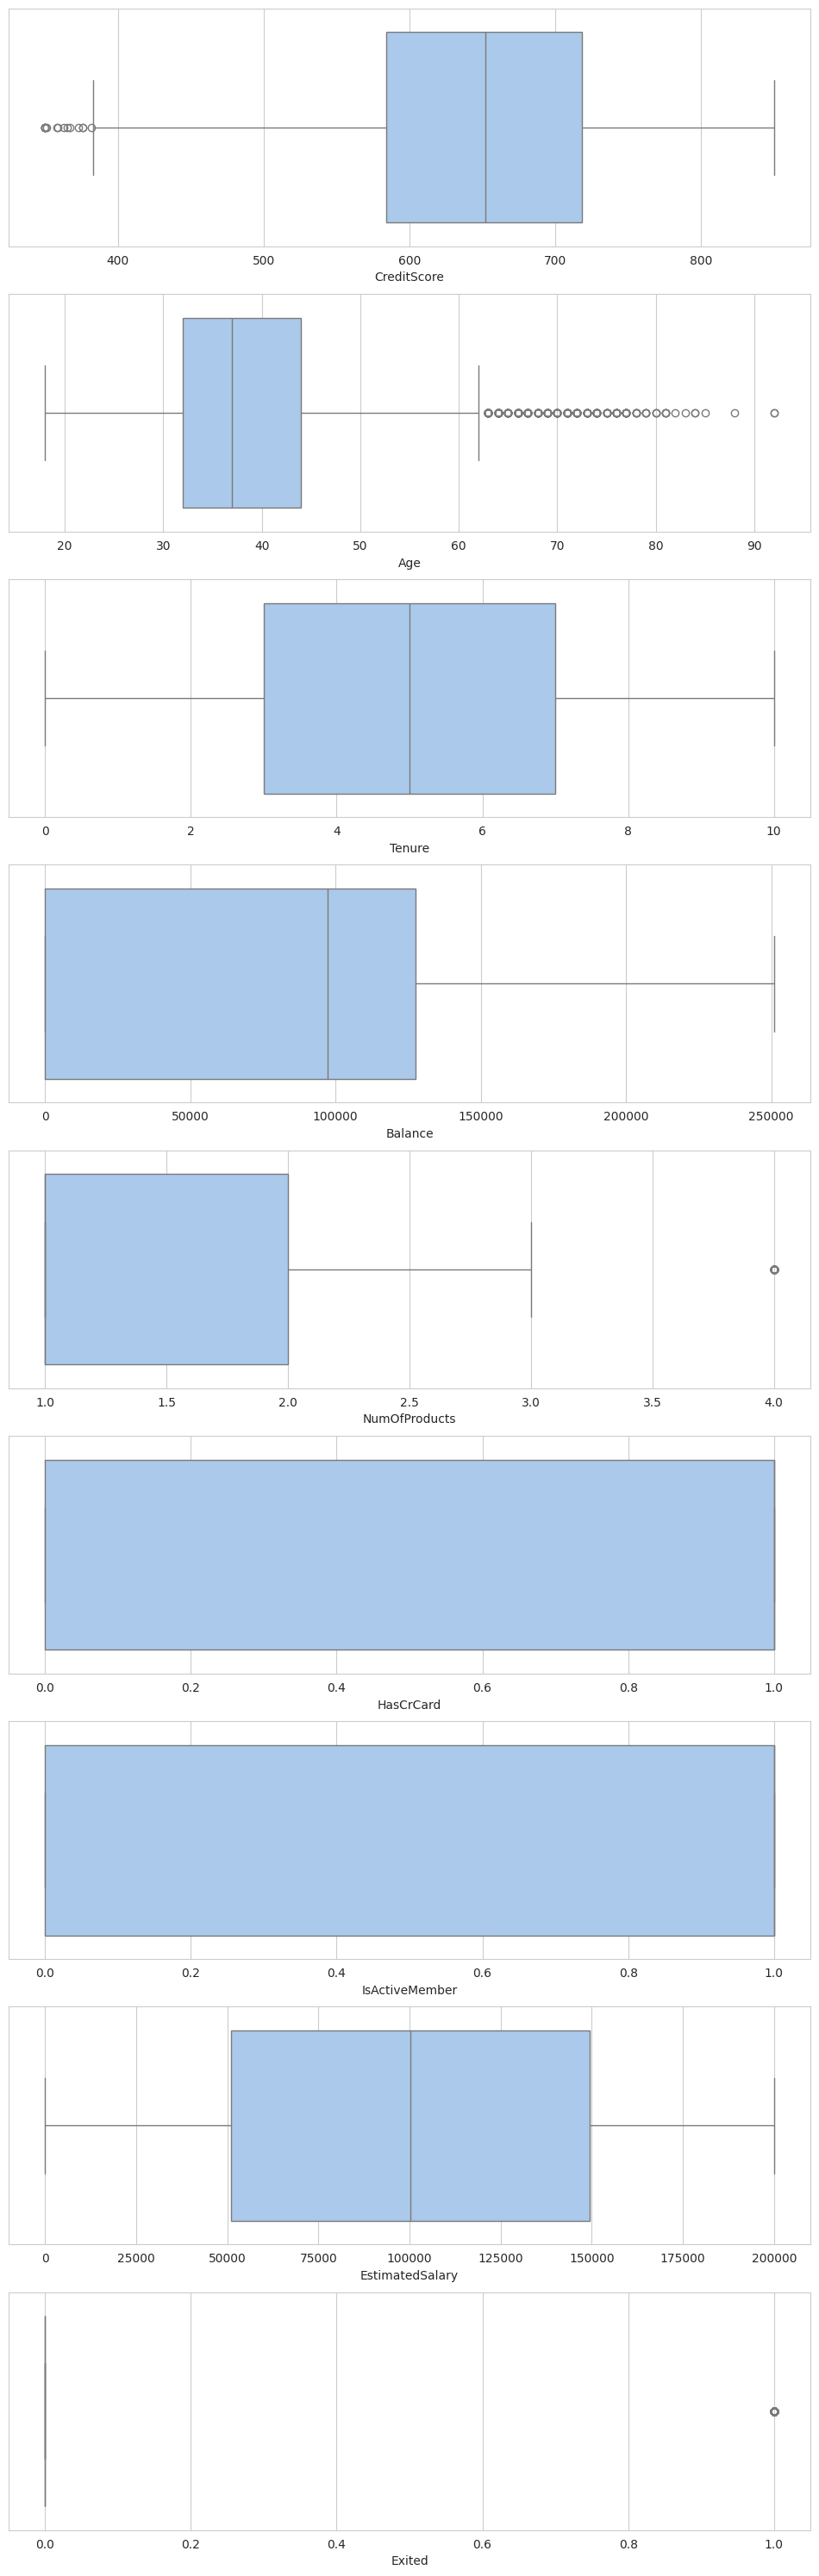

In [ ]:
num_cols = list(bank_df.columns)
for x in cat_cols:
    num_cols.remove(x)
# check outlier
fig, ax = plt.subplots(ncols=1, nrows=9, figsize=(12, 38))
i = 0
for col in num_cols:
    sns.boxplot(data=bank_df, x=col, ax=ax[i], palette='pastel')
    i = i+1


In [ ]:
def detect_outlier(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score= (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
for item in num_cols:
    mean = np.mean(bank_df[f'{item}'])
    print(f'Outliers {item} : {mean}')
    outliers = detect_outlier(bank_df[f'{item}'])
    if outliers: print(outliers)

Outliers CreditScore : 650.5288
[359, 350, 350, 358, 351, 350, 350, 350]
Outliers Age : 38.9218
[75, 73, 72, 79, 80, 75, 72, 82, 74, 71, 72, 74, 76, 71, 73, 77, 74, 74, 74, 74, 74, 72, 77, 74, 88, 71, 72, 71, 75, 73, 76, 85, 74, 76, 72, 71, 74, 72, 72, 84, 71, 74, 84, 77, 79, 76, 73, 73, 76, 72, 71, 80, 74, 76, 75, 77, 74, 71, 75, 78, 74, 71, 77, 79, 81, 79, 71, 72, 71, 72, 72, 78, 75, 71, 73, 71, 71, 76, 73, 75, 73, 71, 72, 73, 92, 75, 71, 77, 92, 72, 71, 76, 72, 77, 74, 72, 73, 77, 71, 72, 81, 76, 74, 71, 76, 72, 81, 73, 71, 75, 71, 71, 71, 73, 72, 71, 81, 73, 74, 83, 71, 78, 72, 74, 80, 72, 76, 71, 71, 78, 78, 77, 77]
Outliers Tenure : 5.0128
Outliers Balance : 76485.889288
Outliers NumOfProducts : 1.5302
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Outliers HasCrCard : 0.7055
Outliers IsActiveMember : 0.5151
Outliers EstimatedSalary : 100090.239881

If we check this code, actually these outliers tend to occur in customer churn so here we decide to keep these outliers

In [ ]:
bank_df[bank_df['NumOfProducts'] == 4].head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1


One-Hot Encoding




In [ ]:
bank_df = pd.get_dummies(bank_df, columns = cat_cols)
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


\Correlation of Predictor Variables with Target Variables

---



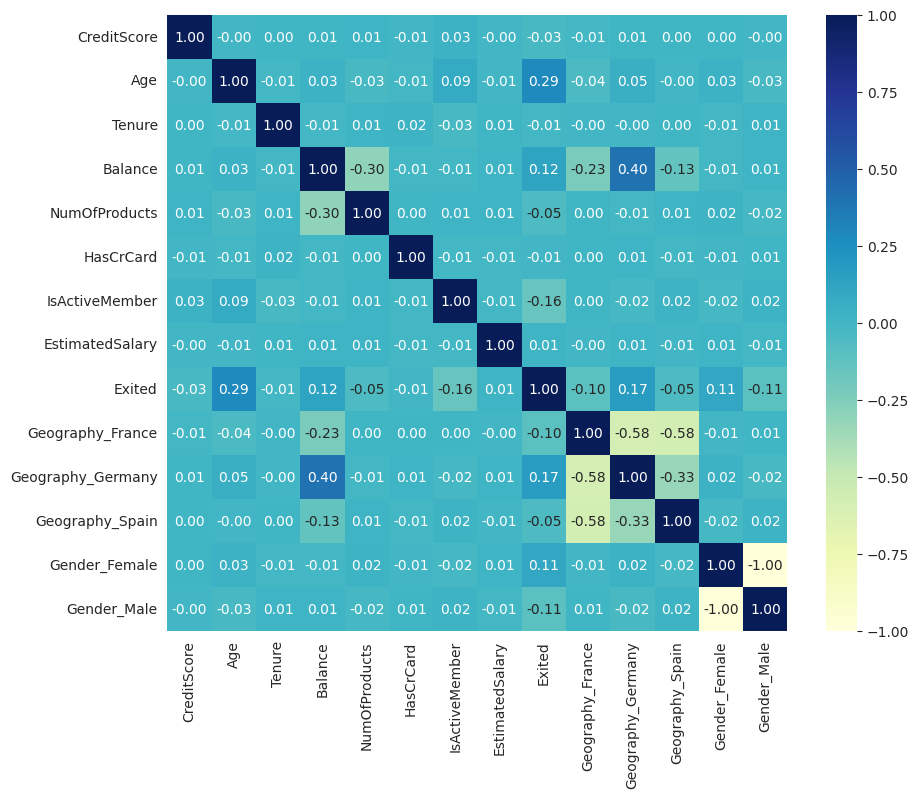

In [ ]:
corr = bank_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

<Axes: >

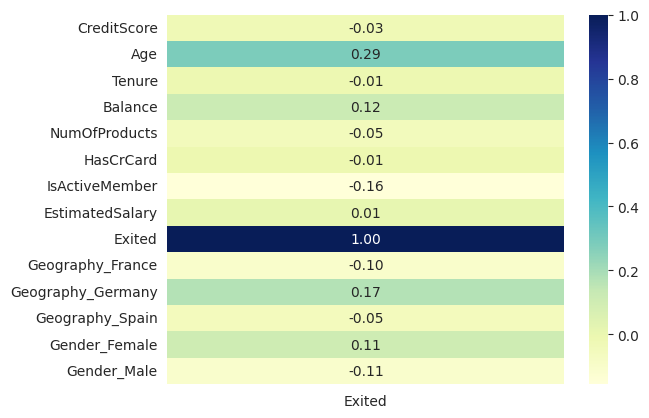

In [ ]:
churn_corr = corr[['Exited']]
sns.heatmap(churn_corr, annot=True,  fmt=".2f", cmap='YlGnBu')

The graph above shows the correlation between the potential churn of customers and the columns. A column with a high correlation indicates that the column has a high impact on potential churn. The 3 columns that most influence potential churn are Age (0.29), Geography_Germany (0.17), and IsActiveMember (-0.16 as a negative correlation)
Then the columns with a high correlation with potential churn will be selected, in this case, the columns with a correlation above/below 0.1 are the facilities that will be maintained as input from the model to be studied.

In [ ]:
high_corr = churn_corr[abs(churn_corr['Exited']) >= 0.1]
high_corr.sort_values(by='Exited', ascending=False)

,Exited
Exited,1.000000
Age,0.285323
Geography_Germany,0.173488
Balance,0.118533
Gender_Female,0.106512
Geography_France,-0.104955
Gender_Male,-0.106512
IsActiveMember,-0.156128


Visualize Data

In [ ]:
high_corr_columns = list(high_corr.index)
high_corr_columns.remove('Exited')

In [ ]:
high_corr_columns

['Age',
 'Balance',
 'IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Gender_Female',
 'Gender_Male']

<Axes: xlabel='Age', ylabel='Count'>

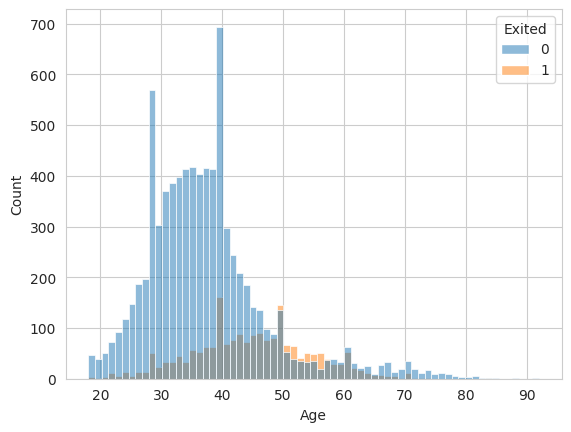

In [ ]:
sns.histplot(bank_df, x='Age', hue='Exited')

From this plot, we know that the distribution of ages shows a difference between those who have potential churn (1) and those who do not have churn (1). Class 0 dominance at a young age (20–50) has no churn potential, whereas the class 1 distribution age tends to be the oldest (around 40–60 years).

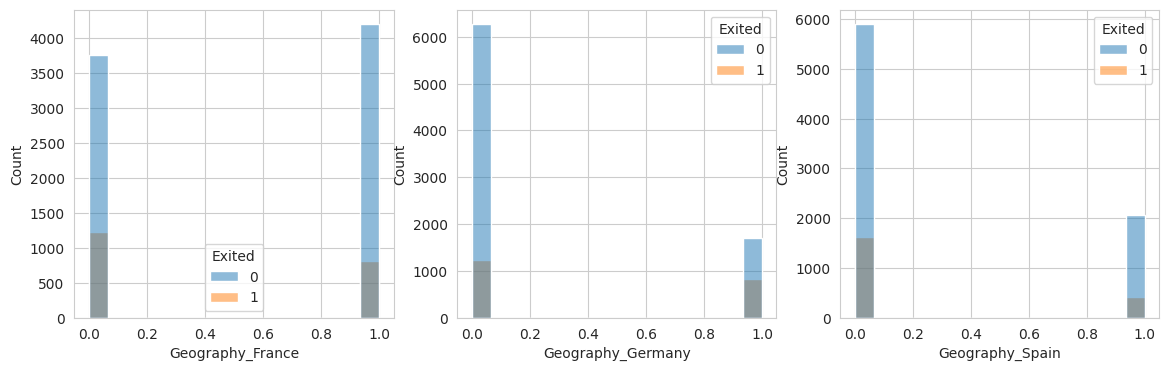

In [ ]:
# check geography distribution
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
idx = 0
for col in bank_df.columns:
    if 'Geography' in col:
        sns.histplot(bank_df, x=col, hue='Exited', ax=ax[idx])
        idx += 1

Based on the above plot, we can conclude that people from Germany and Spain tend not to churn.

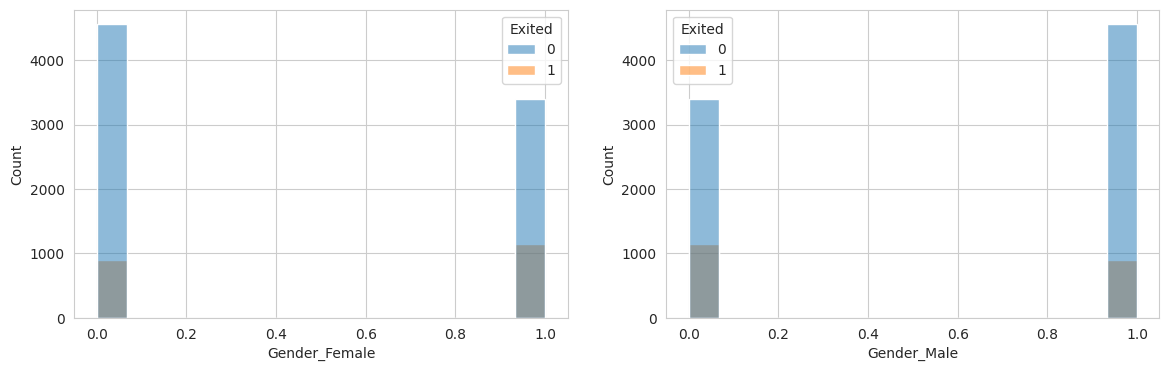

In [ ]:
# check geography distribution
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
idx = 0
for col in bank_df.columns:
    if 'Gender' in col:
        sns.histplot(bank_df, x=col, hue='Exited', ax=ax[idx])
        idx += 1

<Axes: xlabel='Balance', ylabel='Count'>

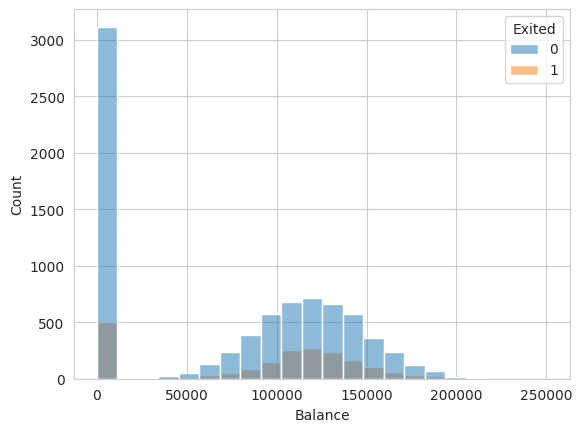

In [ ]:
sns.histplot(bank_df, x='Balance', hue='Exited')


<Axes: xlabel='IsActiveMember', ylabel='Count'>

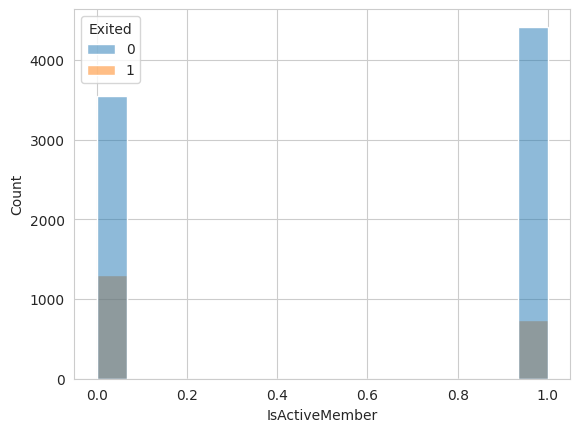

In [ ]:
sns.histplot(bank_df, x='IsActiveMember', hue='Exited')

ven though it actually has almost no effect compared to the influence of age-related features, we know that the active members tend to dominate, potentially preventing churn.

In [ ]:
df = bank_df.copy()
X_raw = df.drop(columns=['Exited'])

X = X_raw.values
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Train - X:', X_train.shape, ' y:', y_train.shape)
print('Test - X:', X_test.shape, ' y:', y_test.shape)

Train - X: (8000, 13)  y: (8000,)
Test - X: (2000, 13)  y: (2000,)


In [ ]:
idx_high_corr_columns = [X_raw.columns.get_loc(c) for c in high_corr_columns if c in X_raw]
idx_high_corr_columns

[1, 3, 6, 8, 9, 11, 12]

Standardization Data

Standardization is a preprocessing step in machine learning that scales the features of a dataset so that they have zero mean and unit variance. This is done by subtracting the mean of each feature from each data point and dividing it by the standard deviation of the feature.

In [ ]:
pd.DataFrame({
    'columns': bank_df.columns,
    'min': list(bank_df.min()),
    'max': list(bank_df.max())
}).sort_values(by='min')

,columns,min,max
2,Tenure,0,10
3,Balance,0.0,250898.09
5,HasCrCard,0,1
6,IsActiveMember,0,1
8,Exited,0,1
9,Geography_France,False,True
10,Geography_Germany,False,True
11,Geography_Spain,False,True
12,Gender_Female,False,True
13,Gender_Male,False,True


In [ ]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In general, normalization is used when the features of the dataset have a Gaussian distribution, and standardization is used when the features do not have a Gaussian distribution.

Normalization is the process of scaling the features of a dataset to a specific range, usually between 0 and 1. It is typically used when the features of the dataset have a Gaussian distribution (bell curve) or when the features have different units of measurement (e.g., height in inches and weight in pounds). Normalization is performed by subtracting the mean of the feature from each data point and then dividing the result by the standard deviation of the feature. This scales the feature to have a mean of 0 and a standard deviation of 1.

Standardization is the process of scaling the features of a dataset to have zero mean and unit variance. It is typically used when the features of the dataset do not have a Gaussian distribution. Standardization is performed by subtracting the mean of the feature from each data point and then dividing the result by the standard deviation of the feature. This scales the feature to have a mean of 0 and a standard deviation of 1.


In [ ]:
# create a svm Classifier
svc = svm.SVC(kernel='linear') # linear kernel

# train the model using train dataset
svc.fit(X_train, y_train)

# predict the churn for test dataset
y_pred = svc.predict(X_test)

In [ ]:
# model accuracy
svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Accuracy Test:", svc_acc)

Accuracy Train: 0.779125
Accuracy Test: 0.7925


❓What would we build the model with the scaled data? Is that much better?  
Time to run svc model is too long 13 minutes than svc using scaled data (only less than 1 minute). We also know that if we using scaled data can reduce time complexity and improve accuracy (1.1%)

In [ ]:
# create a svm Classifier
svc_ss = svm.SVC(kernel='linear') # linear kernel

# train the model using the train data
svc_ss.fit(X_train_ss, y_train)

# predict the churn for test dataset
y_pred_ss = svc_ss.predict(X_test_ss)

In [ ]:
# model accuracy
svc_ss_acc = metrics.accuracy_score(y_test, y_pred_ss)
print("The Model Trained with Scaled Data")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_ss.predict(X_train)))
print("Accuracy Test", svc_ss_acc)

The Model Trained with Scaled Data
Accuracy Train: 0.70375
Accuracy Test 0.8035


Even though we know that scaled data is faster (because time complexity is reduced), we notice that the difference in accuracy values between training and testing on the model with scaled data is pretty much 10%. So, let’s see what happens if we only use features with high correlation!

In [ ]:
X_train_ss_hc = X_train_ss[:,idx_high_corr_columns]
X_test_ss_hc = X_test_ss[:,idx_high_corr_columns]

In [ ]:
# create a svm Classifier
svc_selected = svm.SVC(kernel='linear') # linear kernel

# train the model using the train data
svc_selected.fit(X_train_ss_hc, y_train)

# predict the churn for test dataset
y_pred_selected = svc_selected.predict(X_test_ss_hc)

In [ ]:
# model accuracy
svc_selected_acc = metrics.accuracy_score(y_test, y_pred_selected)
print("The Model Trained with Scaled Data & Only High Correlation Features")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_selected.predict(X_train_ss_hc)))
print("Accuracy Test", svc_selected_acc)
# 0.8035

The Model Trained with Scaled Data & Only High Correlation Features
Accuracy Train: 0.7945
Accuracy Test 0.8035


It turns out that if we use features that have a high correlation, the accuracy of the train model increases, preventing it from being overfit. Because previously the accuracy of the model train was only 70%,

   C: This is the penalty parameter for misclassified training examples. A larger value of C corresponds to a stricter penalty (hard margin), which means that the model will try harder to avoid misclassifying any training examples.

kernel: This parameter specifies the type of kernel to be used in the model. Common choices include the linear kernel, the polynomial kernel, and the radial basis function (RBF) kernel.
gamma: This parameter is used to define the kernel coefficient for the RBF kernel and the polynomial kernel. It controls the width of the kernel and determines how much influence each training example has on the model.

In [ ]:
# create a svm Classifier
svc_optimized = svm.SVC(C=0.1, kernel='rbf', gamma=0.1) # linear kernel

# train the model using the train data
svc_optimized.fit(X_train_ss_hc, y_train)

# predict the churn for test dataset
y_pred_optimized = svc_optimized.predict(X_test_ss_hc)

In [ ]:
# model accuracy
svc_optimized_acc = metrics.accuracy_score(y_test, y_pred_optimized)
print("The Model Optimized SVM")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_optimized.predict(X_train_ss_hc)))
print("Accuracy Test", svc_optimized_acc)

The Model Optimized SVM
Accuracy Train: 0.826
Accuracy Test 0.827


 Sometimes, it can be challenging to determine the best values to use for the hyperparameters of a machine learning model. These hyperparameters can have a significant impact on the model’s performance, and finding the optimal values can require trial and error. One way to tune the hyperparameters of a model is to use grid search or GridSearchCV.

ridSearchCV is a method that involves training a model with a range of different hyperparameter values and evaluating their performance using cross-validation. The goal is to find the combination of hyperparameter values that produces the best model performance. To use GridSearchCV, you will need to specify the range of values that you want to search over for each hyperparameter, as well as the scoring metric that you want to use to evaluate the models. The grid search algorithm will then train and evaluate a model for each combination of hyperparameter values and select the combination that performs the best.

In [ ]:
grid_params = {'C':[0.1,1,10],
               'gamma':[1,0.1,0.001],
               'kernel':['linear','rbf']}

svc_model = svm.SVC()
model_grid = GridSearchCV(svc_model, grid_params)

In [ ]:
model_grid.fit(X_train_ss_hc, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
model_grid.best_params_